In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Load CIFAR-100 dataset with 'fine' labels
#(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


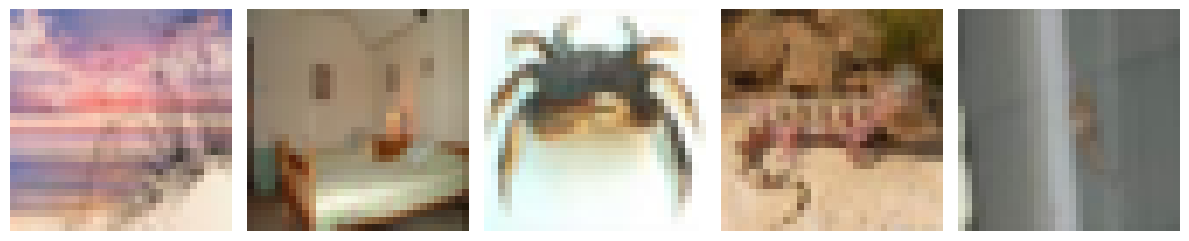

In [25]:


# Display 5 random samples from the training set
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    idx = np.random.randint(0, x_train.shape[0])
    axes[i].imshow(x_train[idx])
    axes[i].axis("off")
plt.tight_layout()
plt.show()



In [26]:
# Scale images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [27]:
#one-hot encode 
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)


In [50]:
# Build the CNN model
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax') 
])

/home/evaberepiki/MDCHAssignment7/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#add earlystopping
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitors validation loss
    patience=5,                 # Stops training after 5 epochs without improvement
    restore_best_weights=True   # Restores the best model weights
)

In [52]:
# Train the model
model.fit(x_train, y_train, epochs= 30, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0421 - loss: 4.3318 - val_accuracy: 0.1698 - val_loss: 3.5199
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1488 - loss: 3.5954 - val_accuracy: 0.2483 - val_loss: 3.0961
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2129 - loss: 3.2366 - val_accuracy: 0.3029 - val_loss: 2.8096
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2579 - loss: 2.9911 - val_accuracy: 0.3282 - val_loss: 2.6773
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2976 - loss: 2.7925 - val_accuracy: 0.3596 - val_loss: 2.5708
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3195 - loss: 2.6647 - val_accuracy: 0.3780 - val_loss: 2.4809
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3481 - loss: 2.5164 - val_accuracy: 0.3947 - val_loss: 2.3493
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3600 - loss: 2.4347 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4339 - loss: 2.1818
Test Loss: 2.1694
Test Accuracy: 0.4365
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


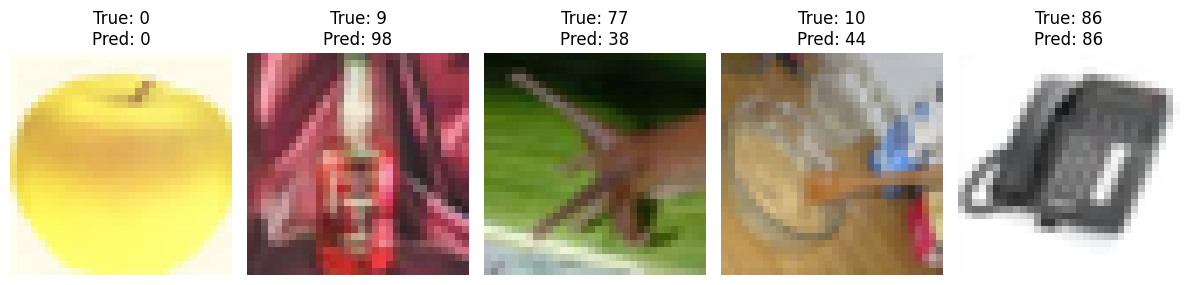

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Select 5 random test images
indices = random.sample(range(len(x_test)), 5)
images = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)
predictions = np.argmax(model.predict(images), axis=1)

# Class names for CIFAR-100
from tensorflow.keras.datasets import cifar100
(_, label_names) = cifar100.load_data(label_mode='fine')

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'True: {true_labels[i]}\nPred: {predictions[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
